In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ydata_profiling import ProfileReport

import spacy
from textblob import TextBlob


df = pd.read_csv("Emotion_final.csv")
pd.set_option('display.max_columns', None)  

c:\Users\impej\miniconda3\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\impej\AppData\Roaming\Python\Python310\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


## création de la BDD fake avec elastique search 

In [1]:
# import requests
# import json
# from faker import Faker

# url = 'http://localhost:9200/notes/_bulk'
# headers = {'Content-Type': 'application/x-ndjson'}

# faker = Faker()

# data = ''
# for _ in range(100):
#     patient_lastname = faker.last_name()
#     patient_firstname = faker.first_name()
#     text = faker.text()
#     date = faker.date()
#     patient_left = faker.boolean()
#     emotion = faker.word()
#     confidence = faker.pyfloat(left_digits=1, right_digits=2, positive=True)

#     index = {"index": {}}
#     doc = {
#         "patient_lastname": patient_lastname,
#         "patient_firstname": patient_firstname,
#         "text": text,
#         "date": date,
#         "patient_left": patient_left,
#         "emotion": emotion,
#         "confidence": confidence
#     }

#     data += json.dumps(index) + '\n'
#     data += json.dumps(doc) + '\n'

# response = requests.post(url, headers=headers, data=data)
# print(response.text)


{"took":755,"errors":false,"items":[{"index":{"_index":"notes","_type":"_doc","_id":"h5IEIIkBdEg6yxurU0ah","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":0,"_primary_term":1,"status":201}},{"index":{"_index":"notes","_type":"_doc","_id":"iJIEIIkBdEg6yxurU0ah","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":1,"_primary_term":1,"status":201}},{"index":{"_index":"notes","_type":"_doc","_id":"iZIEIIkBdEg6yxurU0ah","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":2,"_primary_term":1,"status":201}},{"index":{"_index":"notes","_type":"_doc","_id":"ipIEIIkBdEg6yxurU0ah","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":3,"_primary_term":1,"status":201}},{"index":{"_index":"notes","_type":"_doc","_id":"i5IEIIkBdEg6yxurU0ah","_version":1,"result":"created","_shards":{"total":2,"successful":1,"failed":0},"_seq_no":4,"_primary_term":1

In [2]:
import requests
import json

url = 'http://localhost:9200/notes/_search'
headers = {'Content-Type': 'application/json'}

query = {
    "query": {
        "match_all": {}
    }
}

response = requests.get(url, headers=headers, data=json.dumps(query))
print(response.text)


{"took":4,"timed_out":false,"_shards":{"total":1,"successful":1,"skipped":0,"failed":0},"hits":{"total":{"value":100,"relation":"eq"},"max_score":1.0,"hits":[{"_index":"notes","_type":"_doc","_id":"h5IEIIkBdEg6yxurU0ah","_score":1.0,"_source":{"patient_lastname": "Chambers", "patient_firstname": "Adrian", "text": "Source decide game player dog owner often. Tree increase particularly arrive friend stay.\nSituation Congress Democrat stand. Cold he Mr.", "date": "2008-09-07", "patient_left": true, "emotion": "break", "confidence": 5.53}},{"_index":"notes","_type":"_doc","_id":"iJIEIIkBdEg6yxurU0ah","_score":1.0,"_source":{"patient_lastname": "Davis", "patient_firstname": "Gary", "text": "Democrat factor number card people value daughter. Win product both reveal leg he fall. Kid agree through newspaper boy senior theory light.", "date": "2007-01-24", "patient_left": true, "emotion": "add", "confidence": 0.19}},{"_index":"notes","_type":"_doc","_id":"iZIEIIkBdEg6yxurU0ah","_score":1.0,"_sou

In [4]:
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
df = pd.read_csv("Emotion_final.csv")

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    filtered_tokens = [token for token in tokens if not (nlp.vocab[token].is_punct or nlp.vocab[token].is_stop or len(token) < 3 or token.isnumeric() or token.isspace() or token.lower() in {'feel', 'feeling','feelings', 'like','im','really', 'today','didnt','go', 'know', 'get', 'want', 'would', 'time', 'little', 'ive', 'still', 'even', 'one',  'people', 'think', 'bit', 'things', 'much', 'dont', 'make', 'day', 'something', 'back', 'going', 'way', 'could'})]    
    return ' '.join(filtered_tokens)

corpus = df['Text'].tolist()
corpus = [preprocess(text) for text in corpus]

# TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.toarray())

['000' '12' '1997' ... 'zum' 'zumba' 'zzap']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


y = df['Emotion'].values

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.86


In [13]:
from elasticsearch import Elasticsearch
from faker import Faker

faker = Faker()

# Prédictions de probabilité pour chaque texte
proba = clf.predict_proba(X)

# Récupération des étiquettes de classe
class_labels = le.inverse_transform(clf.classes_)

# Remplissage des colonnes "emotion" et "confidence"
df['emotion'] = [class_labels[np.argmax(p)] for p in proba]
df['confidence'] = [np.max(p) for p in proba]

# Connexion à Elasticsearch
es = Elasticsearch(hosts=['http://localhost:9200'])

# Indexation des données dans Elasticsearch
for _, row in df.iterrows():
    patient_lastname = faker.last_name()
    patient_firstname = faker.first_name()
    date = faker.date()
    patient_left = faker.boolean()
    
    doc = {
        'patient_lastname': patient_lastname,
        'patient_firstname': patient_firstname,
        'text': row['Text'],
        'date': date,
        'patient_left': patient_left,
        'emotion': row['emotion'],
        'confidence': row['confidence']
    }
    es.index(index='notes', body=doc)


C:\Users\impej\AppData\Local\Temp\ipykernel_9752\4233235036.py:35: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use the 'document' parameter. See https://github.com/elastic/elasticsearch-py/issues/1698 for more information
  es.index(index='notes', body=doc)
C:\Users\impej\AppData\Local\Temp\ipykernel_9752\4233235036.py:35: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  es.index(index='notes', body=doc)


In [14]:
from elasticsearch import Elasticsearch

# Connexion à Elasticsearch
es = Elasticsearch(hosts=['http://localhost:9200'])

# Requête de recherche pour récupérer tous les documents
query = {
    "query": {
        "match": {
            "emotion": "happy"
        }
    }
}

# Exécution de la requête de recherche
res = es.search(index='notes', body=query)

# Récupération des résultats
hits = res['hits']['hits']

# Affichage des résultats
for hit in hits:
    print(hit['_source'])


C:\Users\impej\AppData\Local\Temp\ipykernel_9752\1124562407.py:16: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(index='notes', body=query)


{'patient_lastname': 'Reyes', 'patient_firstname': 'Brittney', 'text': 'i have been with petronas for years i feel that petronas has performed well and made a huge profit', 'date': '2020-06-22', 'patient_left': True, 'emotion': 'happy', 'confidence': 0.7171750434783539}
{'patient_lastname': 'Strickland', 'patient_firstname': 'Andrew', 'text': 'i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter', 'date': '1997-12-16', 'patient_left': False, 'emotion': 'happy', 'confidence': 0.99}
{'patient_lastname': 'Werner', 'patient_firstname': 'Patrick', 'text': 'i have immense sympathy with the general point but as a possible proto writer trying to find time to write in the corners of life and with no sign of an agent let alone a publishing contract this feels a little precious', 'date': '2000-07-21', 'patient_left': True, 'emotion': 'happy', 'confidence': 0.94}
{'patient_lastname': 'Baldwin', 'patient_firstname': 'Alicia', 'text': 'i do not

C:\Users\impej\AppData\Local\Temp\ipykernel_9752\1124562407.py:16: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  res = es.search(index='notes', body=query)


# effacement

In [12]:
# import requests

# index = 'notes'  # Remplacez par le nom de votre index

# # URL de l'API de suppression des documents
# url = f'http://localhost:9200/{index}/_delete_by_query'

# # Corps de la requête de suppression
# query = {
#     "query": {
#         "match_all": {}
#     }
# }

# # Envoyer la requête de suppression
# response = requests.post(url, json=query)

# # Vérifier la réponse
# if response.status_code == 200:
#     print("Les documents ont été supprimés avec succès.")
# else:
#     print("Une erreur s'est produite lors de la suppression des documents.")
#     print(response.text)

Les documents ont été supprimés avec succès.


 ## En recherchant dans la base elastic search, aboutissez à un data frame permettant d’afficher la répartition des sentiments des textes pour un patient (nom/prénom)

In [15]:
from elasticsearch import Elasticsearch
import pandas as pd

# Connexion à Elasticsearch
es = Elasticsearch(hosts=['http://localhost:9200'])

# Nom et prénom du patient
patient_lastname = 'Reyes'
patient_firstname = 'Brittney'

# Requête de recherche pour récupérer les documents correspondant au patient
query = {
    "query": {
        "bool": {
            "must": [
                {"match": {"patient_lastname": patient_lastname}},
                {"match": {"patient_firstname": patient_firstname}}
            ]
        }
    }
}

# Exécution de la requête de recherche
res = es.search(index='notes', body=query)

# Récupération des résultats
hits = res['hits']['hits']

# Création d'un DataFrame à partir des résultats
data = [hit['_source'] for hit in hits]
df = pd.DataFrame(data)

# Calcul de la répartition des sentiments
sentiment_counts = df['emotion'].value_counts(normalize=True)

# Affichage des résultats
print(sentiment_counts)


C:\Users\impej\AppData\Local\Temp\ipykernel_9752\671719386.py:24: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(index='notes', body=query)


happy    1.0
Name: emotion, dtype: float64


C:\Users\impej\AppData\Local\Temp\ipykernel_9752\671719386.py:24: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  res = es.search(index='notes', body=query)


####  Élaborez une matrice de sentiments contradictoire (toujours en utilisant la base elastic search.
#### On veut savoir parmi les documents classifiés comme happy, quel pourcentage contient le mot “sadness”. Puis quel pourcentage contient “fear” …
#### Et cela pour tous les sentiment.
#### On représente les résultats dans une HeatMap


C:\Users\impej\AppData\Local\Temp\ipykernel_9752\2979511391.py:26: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(index='notes', body=query)
C:\Users\impej\AppData\Local\Temp\ipykernel_9752\2979511391.py:26: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  res = es.search(index='notes', body=query)


<AxesSubplot: >

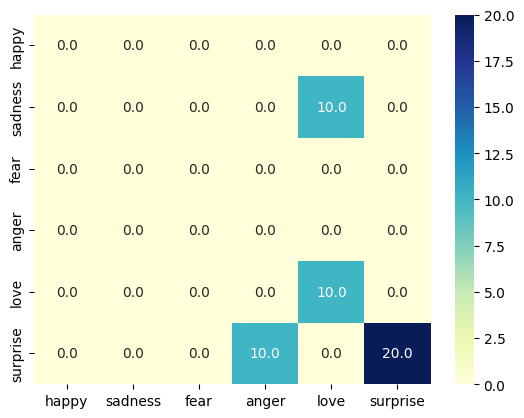

In [29]:
from elasticsearch import Elasticsearch
import pandas as pd
import seaborn as sns

# Connexion à Elasticsearch
es = Elasticsearch(hosts=['http://localhost:9200'])

# Liste des sentiments à inclure dans la matrice
sentiments = ['happy', 'sadness', 'fear', 'anger', 'love', 'surprise']

# Initialisation de la matrice des pourcentages
matrix = pd.DataFrame(0, index=sentiments, columns=sentiments)

# Pour chaque sentiment dans la liste
for sentiment in sentiments:
    # Requête de recherche pour récupérer les documents correspondant au sentiment
    query = {
        "query": {
            "match": {
                "emotion": sentiment
            }
        }
    }

    # Exécution de la requête de recherche
    res = es.search(index='notes', body=query)

    # Récupération des résultats
    hits = res['hits']['hits']
    
    # Nombre total de documents retournés par la recherche
    total_count = len(hits)
    
    # Si aucun document n'a été retourné, passez au sentiment suivant
    if total_count == 0:
        continue

    # Pour chaque mot dans la liste des sentiments
    for word in sentiments:
        # Compteur du nombre de documents contenant le mot
        word_count = 0
        
        # Pour chaque document retourné par la recherche
        for hit in hits:
            # Récupération du texte du document
            text = hit['_source']['text']
            
            # Si le texte contient le mot, incrémentez le compteur
            if word in text:
                word_count += 1
        
        # Calcul du pourcentage de documents contenant le mot
        percentage = word_count / total_count
        
        # Mise à jour de la matrice des pourcentages
        matrix.loc[sentiment, word] = percentage

# Conversion des valeurs en pourcentage
matrix *= 100

# Affichage de la HeatMap avec les pourcentages
sns.heatmap(matrix, annot=True, fmt='.1f', cmap='YlGnBu')


### Pour chacune des étapes du deuil (denial, anger, bargaining, depression, and acceptance) rechercher le nombre de text correspondants à l’aide:
###         - d’une recherche pleine
###         - d’une fuzzy recherche.

In [18]:
from elasticsearch import Elasticsearch

# Connexion à Elasticsearch
es = Elasticsearch(hosts=['http://localhost:9200'])

# Liste des étapes du deuil à inclure dans la recherche
stages = ['denial', 'anger', 'bargaining', 'depression', 'acceptance']

# Pour chaque étape dans la liste
for stage in stages:
    # Requête de recherche pour la recherche pleine
    full_query = {
        "query": {
            "match": {
                "text": stage
            }
        }
    }

    # Requête de recherche pour la recherche floue
    fuzzy_query = {
        "query": {
            "fuzzy": {
                "text": stage
            }
        }
    }

    # Exécution des requêtes de recherche
    full_res = es.search(index='notes', body=full_query)
    fuzzy_res = es.search(index='notes', body=fuzzy_query)

    # Récupération des résultats
    full_hits = full_res['hits']['hits']
    fuzzy_hits = fuzzy_res['hits']['hits']
    
    # Affichage des résultats
    print(f"{stage}: {len(full_hits)} (full search), {len(fuzzy_hits)} (fuzzy search)")


C:\Users\impej\AppData\Local\Temp\ipykernel_9752\2329163694.py:30: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  full_res = es.search(index='notes', body=full_query)
C:\Users\impej\AppData\Local\Temp\ipykernel_9752\2329163694.py:30: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  full_res = es.search(index='notes', body=full_query)
C:\Users\impej\AppData\Local\Temp\ipykernel_9752\2329163694.py:31: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  fuzzy_res = es.search(index='notes', body=fuzzy_query)
C:\Users\impej\AppData\Local\Temp\ipykernel_9752\2329163694.py:31: ElasticsearchWarning: Elasticsearch built-

denial: 2 (full search), 10 (fuzzy search)
anger: 10 (full search), 10 (fuzzy search)
bargaining: 0 (full search), 0 (fuzzy search)
depression: 10 (full search), 10 (fuzzy search)
acceptance: 9 (full search), 10 (fuzzy search)


### Rechercher les textes:
####            - qui doivent matcher l’expression “good day” (must)
####            - chez les patients encore en consultation (filter)
####            - qui contiennent si possible “to rest” (should)
####            - qui ne doivent pas avoir seuil de confiance inférieur à 0.5 s’il existe. 
####            - Observer la répartition de ces résultats par sentiment

In [19]:
from elasticsearch import Elasticsearch
import pandas as pd

# Connexion à Elasticsearch
es = Elasticsearch(hosts=['http://localhost:9200'])

# Requête de recherche pour récupérer les documents correspondant aux critères
query = {
    "query": {
        "bool": {
            "must": [
                {"match_phrase": {"text": "good day"}}
            ],
            "filter": [
                {"term": {"patient_left": False}}
            ],
            "should": [
                {"match_phrase": {"text": "to rest"}}
            ],
            "must_not": [
                {"range": {"confidence": {"lt": 0.5}}}
            ]
        }
    }
}

# Exécution de la requête de recherche
res = es.search(index='notes', body=query)

# Récupération des résultats
hits = res['hits']['hits']

# Création d'un DataFrame à partir des résultats
data = [hit['_source'] for hit in hits]
df = pd.DataFrame(data)

# Calcul de la répartition des sentiments
sentiment_counts = df['emotion'].value_counts(normalize=True)

# Affichage des résultats
print(sentiment_counts)


fear       0.5
sadness    0.5
Name: emotion, dtype: float64


C:\Users\impej\AppData\Local\Temp\ipykernel_9752\337012199.py:28: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(index='notes', body=query)
C:\Users\impej\AppData\Local\Temp\ipykernel_9752\337012199.py:28: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  res = es.search(index='notes', body=query)
